In [161]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [162]:
input_folder = '../data/bycity'

In [163]:
input_file_list = glob(os.path.join(input_folder, '*.csv'))

In [164]:
def get_poi_name_pair(p):
    df_tmp = pd.read_csv(p)
    poi_info = df_tmp[['poi_id','poi_name', 'country_name']].drop_duplicates()
    if len(poi_info) > 1:
        raise ValueError('not single poi')
    return (poi_info.loc[0, 'poi_id'],poi_info.loc[0, 'poi_name'], poi_info.loc[0, 'country_name'])

In [165]:
df_poi = pd.DataFrame([get_poi_name_pair(p) for p in input_file_list], columns=['poi_id','poi_name', 'country_name'])

In [166]:
#df_poi['country_name'].drop_duplicates().to_csv('../data/country_list.csv', index=False)

In [167]:
df_gdp = pd.read_csv('../data/OECD/world_per_capita_gdp.csv')

In [168]:
df_gdp.tail()

,country,1,1000,1500,1600,1700,1820,1870,1913,1950,1973,2001
22,China,450.0,450.0,600,600,600,600,530,552,439,839,3583
23,India,450.0,450.0,550,550,550,533,533,673,619,853,1957
24,Other Asia,450.0,450.0,565,565,565,584,643,882,926,2049,3998
25,Africa,430.0,425.0,414,422,421,420,500,637,894,1410,1489
26,World,445.0,436.0,566,595,615,667,875,1525,2111,4091,6049


In [169]:
df_poi.head()

,poi_id,poi_name,country_name
0,1001,ヤンマイエン島,ノルウェー
1,10015,ヘルゴラント,ドイツ
2,10020,リスト,ドイツ
3,1003,HORNSUND,ノルウェー
4,10035,シュレスビヒ,ドイツ


In [170]:
df_match = pd.read_csv('../data/country_list.csv')

In [171]:
df_match.head()

,country_name,key
0,ノルウェー,Norway
1,ドイツ,Germany
2,オーストリア,Austria
3,ポーランド,Eastern Europe
4,ハンガリー,Eastern Europe


In [172]:
df_poi = df_poi.merge(df_match, left_on='country_name', right_on='country_name')
df_poi.head()

,poi_id,poi_name,country_name,key
0,1001,ヤンマイエン島,ノルウェー,Norway
1,1003,HORNSUND,ノルウェー,Norway
2,1007,ニューオーレースン,ノルウェー,Norway
3,1008,スバールバル諸島,ノルウェー,Norway
4,1023,バルフォス飛行場,ノルウェー,Norway


In [173]:
df_poi

,poi_id,poi_name,country_name,key
0,1001,ヤンマイエン島,ノルウェー,Norway
1,1003,HORNSUND,ノルウェー,Norway
2,1007,ニューオーレースン,ノルウェー,Norway
3,1008,スバールバル諸島,ノルウェー,Norway
4,1023,バルフォス飛行場,ノルウェー,Norway
...,...,...,...,...
6540,98752,ブトゥアン,フィリピン,Other Asia
6541,98753,ダバオ,フィリピン,Other Asia
6542,98755,HINATUAN,フィリピン,Other Asia
6543,98836,サンボアンガ,フィリピン,Other Asia


In [174]:
def get_average_temp_city(poi_id):
    df_tmp = pd.read_csv(os.path.join('../data/bycity/', f'{poi_id}.csv'))
    return df_tmp[['mean', 'min', 'max']].mean()

get_average_temp_country = lambda df: pd.concat([get_average_temp_city(poi_id) for poi_id in df['poi_id']],axis=1).T.mean()

In [175]:
values = []

for _,r in df_gdp.iterrows():
    df_target_poi = df_poi[df_poi['key'] == r.country]
    if len(df_target_poi) == 0:
        print(r.country)
        continue
    tmp = get_average_temp_country(df_target_poi)
    values.append([r.country] + tmp.to_list())

df_tempreture_summary = pd.DataFrame(values,columns = ['country', 'mean', 'min', 'max'])


Denmark
World


In [176]:
df_tempreture_summary

,country,mean,min,max
0,Austria,7.968887,3.758272,13.122240
1,Belgium,9.946790,6.840821,13.620954
2,Finland,3.299791,-0.781424,7.053533
3,France,12.232502,8.158744,16.968256
4,Germany,9.029327,5.496305,13.074430
5,Italy,14.334248,10.619195,18.784311
6,Netherlands,10.366372,7.038559,13.999981
7,Norway,4.144047,0.569571,7.822229
8,Sweden,4.604092,0.639273,8.367540
9,Switzerland,7.112908,3.404286,11.737315


In [179]:
df_all = df_gdp.merge(df_tempreture_summary, how='inner', on='country')

In [178]:
for country in ['Former USSR', 'Other Western Offshoots']:
    df_all = df_all[df_all['country']!=country]

In [180]:
df_all

,country,1,1000,1500,1600,1700,1820,1870,1913,1950,1973,2001,mean,min,max
0,Austria,NaN,NaN,707,837,993,1218,1863,3465,3706,11235,20225,7.968887,3.758272,13.122240
1,Belgium,NaN,NaN,875,976,1144,1319,2692,4220,5462,12170,20924,9.946790,6.840821,13.620954
2,Finland,NaN,NaN,453,538,638,781,1140,2111,4253,11085,20344,3.299791,-0.781424,7.053533
3,France,NaN,NaN,727,841,910,1135,1876,3485,5271,13114,21092,12.232502,8.158744,16.968256
4,Germany,NaN,NaN,688,791,910,1077,1839,3648,3881,11966,18677,9.029327,5.496305,13.074430
5,Italy,NaN,NaN,1100,1100,1100,1117,1499,2564,3502,10634,19040,14.334248,10.619195,18.784311
6,Netherlands,NaN,NaN,761,1381,2130,1838,2757,4049,5996,13082,21722,10.366372,7.038559,13.999981
7,Norway,NaN,NaN,640,760,900,1104,1432,2501,5463,11246,24580,4.144047,0.569571,7.822229
8,Sweden,NaN,NaN,695,824,977,1198,1662,3096,6739,13493,20562,4.604092,0.639273,8.367540
9,Switzerland,NaN,NaN,632,750,890,1090,2102,4266,9064,18204,22264,7.112908,3.404286,11.737315


In [192]:
df_all.to_csv('output.csv', index=False)

In [181]:
clm = '1500	1600	1700	1820	1870	1913	1950	1973	2001'.split('\t')

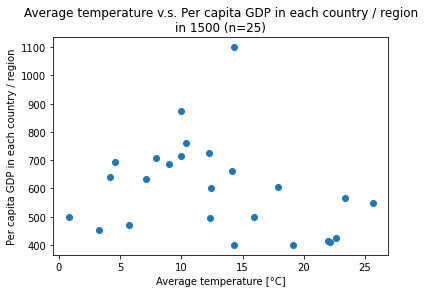

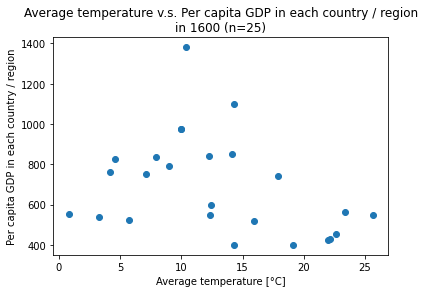

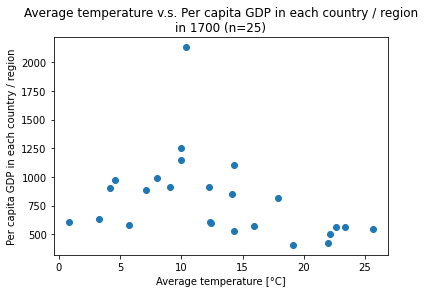

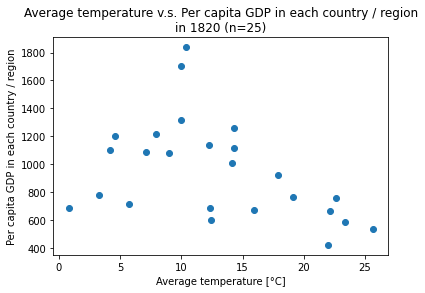

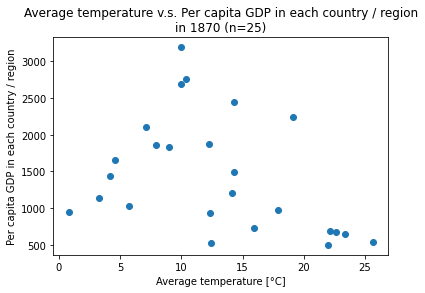

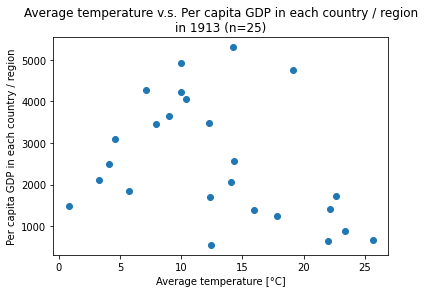

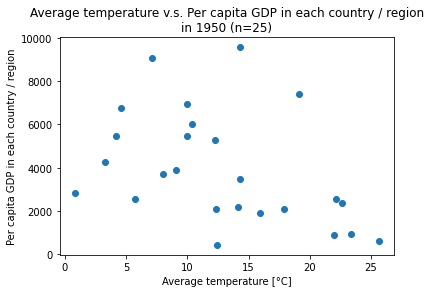

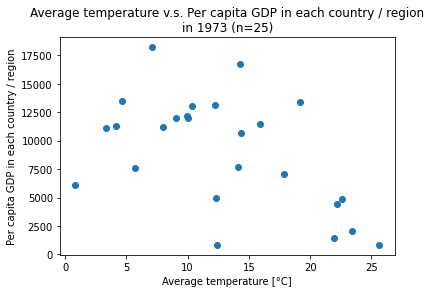

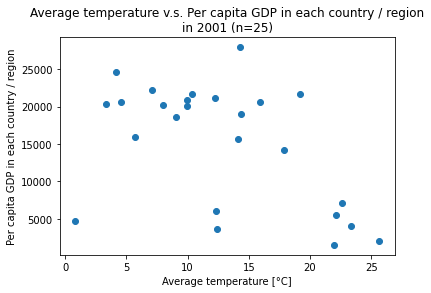

In [204]:
for y in clm:
    plt.clf()
    plt.scatter(df_all['mean'], df_all[y])
    plt.title(f'Average temperature v.s. Per capita GDP in each country / region\nin {y} (n={len(df_all["mean"])})')
    plt.xlabel('Average temperature [°C]')
    plt.ylabel('Per capita GDP in each country / region')
    plt.savefig(f'{y}.png')
    plt.show()

<AxesSubplot:>

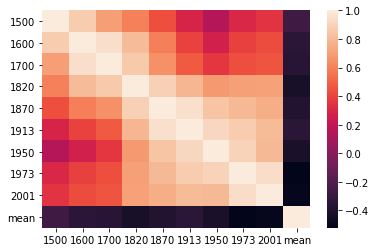

In [183]:
sns.heatmap(df_all[df_all.columns[3:-2]].corr())

In [184]:
df_all[df_all.columns[3:]].corr()['mean'][:-3]

1500   -0.266391
1600   -0.348738
1700   -0.355804
1820   -0.421011
1870   -0.384055
1913   -0.354081
1950   -0.417802
1973   -0.521362
2001   -0.500649
Name: mean, dtype: float64

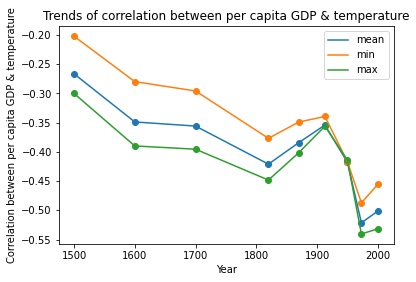

In [203]:
plt.clf()
for v in ['mean', 'min', 'max']:
    data = df_all[df_all.columns[3:]].corr()[v][:-3]
    data.index = data.index.astype(int)
    plt.scatter(data.index,data.values)
    plt.plot(data.index,data.values, label=v)
plt.legend()
plt.title('Trends of correlation between per capita GDP & temperature')
plt.xlabel('Year')
plt.ylabel('Correlation between per capita GDP & temperature')
plt.show()

In [201]:
type(data.index[0])

str

In [197]:
df_all[df_all.columns[3:]].corr()[v][:-3]

1500   -0.266391
1600   -0.348738
1700   -0.355804
1820   -0.421011
1870   -0.384055
1913   -0.354081
1950   -0.417802
1973   -0.521362
2001   -0.500649
Name: mean, dtype: float64

In [68]:
pd.concat([get_average_temp(poi_id) for poi_id in df_target_poi['poi_id']],axis=1).T.mean()

mean     7.968887
min      3.758272
max     13.122240
dtype: float64

In [61]:
df_tmp = pd.read_csv(os.path.join('../data/bycity/', f'{11010}.csv'))

mean     9.403014
min      5.349589
max     14.088767
dtype: float64